In [1]:
%pip install boto3
%pip install pandas
%pip install matplotlib
%pip install io

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement io (from versions: none)
ERROR: No matching distribution found for io
Note: you may need to restart the kernel to use updated packages.


In [2]:
import boto3
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import io

In [3]:
# Nome do bucket e arquivo
BUCKET_NAME = 'bucket-trusted-upa-connect'  # seu bucket
CSV_FILE_KEY = 'umidade_ambiente_tratado.csv/part-00000-4937f2af-6308-4416-b7ed-15d7b6b909d1-c000.csv'

# Cria o cliente S3 usando a Role da EC2
s3 = boto3.client('s3')

# Faz o download do objeto CSV
obj = s3.get_object(Bucket=BUCKET_NAME, Key=CSV_FILE_KEY)

# Lê o CSV diretamente da memória
df = pd.read_csv(io.BytesIO(obj['Body'].read()))

/usr/local/lib/python3.7/site-packages/boto3/compat.py:82: PythonDeprecationWarning: Boto3 will no longer support Python 3.7 starting December 13, 2023. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.8 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)


In [4]:
# Exibe o DataFrame (opcional)
display(df.head())

,id_umidade,data_hora,fk_upa,valor
0,1,2025-04-27 21:34:50,1,50.5
1,2,2025-04-27 21:39:50,1,49.8
2,3,2025-04-27 21:44:50,1,49.0
3,4,2025-04-27 21:49:50,1,48.1
4,5,2025-04-27 21:54:50,1,48.9


In [5]:
# Filtrar somente os dados da UPA 1
df_upa1 = df[df['fk_upa'] == 1].copy()

# Transformar o campo 'data_hora' em datetime
df_upa1['data_hora'] = pd.to_datetime(df_upa1['data_hora'])

In [6]:
# Agrupar por hora e calcular a média
df_upa1.set_index('data_hora', inplace=True)
df_resampled = df_upa1['valor'].resample('H').mean()

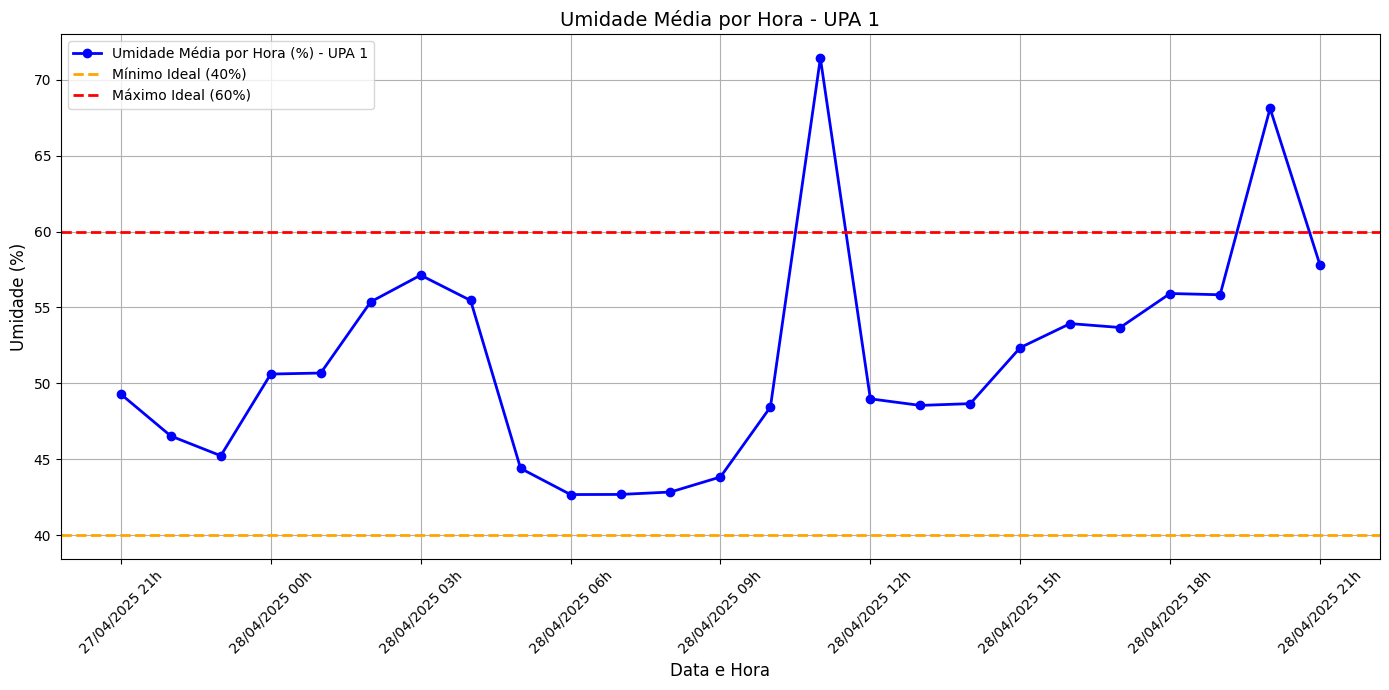

In [7]:
# Plotar o gráfico de linhas
plt.figure(figsize=(14, 7))

# Linha da umidade média por hora
plt.plot(df_resampled.index, df_resampled, label='Umidade Média por Hora (%) - UPA 1', color='blue', marker='o', linestyle='-', linewidth=2)

# Linhas horizontais de referência
plt.axhline(40, color='orange', linestyle='--', linewidth=2, label='Mínimo Ideal (40%)')
plt.axhline(60, color='red', linestyle='--', linewidth=2, label='Máximo Ideal (60%)')

# Formatação do eixo X
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y %Hh'))
plt.xticks(rotation=45)

# Configurações dos eixos
plt.xlabel('Data e Hora', fontsize=12)
plt.ylabel('Umidade (%)', fontsize=12)
plt.title('Umidade Média por Hora - UPA 1', fontsize=14)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()